<a href="https://colab.research.google.com/github/futurebly/Web-AI/blob/main/Day18_%EC%8B%A4%EC%8A%B5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.k-NN(지도학습)
- 닥스훈트, 사모예드, 말티즈

## Classification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 닥스훈트의 길이와 높이 데이터
dach_length = [75, 77, 83, 81, 73, 99, 72, 83]
dach_height = [24, 29, 19, 32, 21, 22, 19, 34]

# 사모예드의 길이와 높이 데이터
samo_length = [76, 78, 82, 88, 76, 83, 81, 89]
samo_height = [55, 58, 53, 54, 61, 52, 57, 64]

# 말티즈의 길이와 높이 데이터
malti_length = [35, 39, 38, 41, 30, 57, 41, 35]
malti_height = [23, 26, 19, 30, 21, 24, 28, 20]

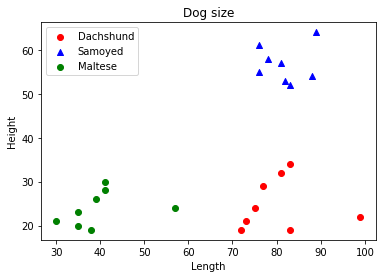

In [ ]:
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height, c='blue', marker='^', label='Samoyed')
plt.scatter(malti_length, malti_height, c='green', label='Maltese')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='upper left')

plt.show()

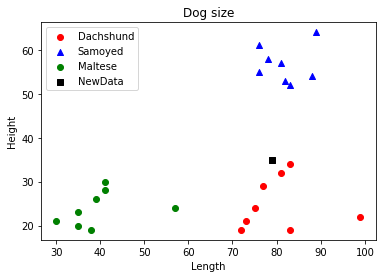

In [ ]:
new_length = [79]
new_height = [35]

plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height, c='blue', marker='^', label='Samoyed')
plt.scatter(malti_length, malti_height, c='green', label='Maltese')
plt.scatter(new_length, new_height, c='black', marker='s', label='NewData')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='upper left')

plt.show()

In [ ]:
d_data = np.column_stack((dach_length, dach_height))
d_data

array([[75, 24],
       [77, 29],
       [83, 19],
       [81, 32],
       [73, 21],
       [99, 22],
       [72, 19],
       [83, 34]])

In [ ]:
d_label = [0]*(len(d_data))
d_label

[0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
s_data = np.column_stack((samo_length, samo_height))
s_label = [1]*(len(s_data))

In [ ]:
m_data = np.column_stack((malti_length, malti_height))
m_label = [2]*(len(m_data))

In [ ]:
dogs = np.concatenate((d_data, s_data, m_data))
dogs

array([[75, 24],
       [77, 29],
       [83, 19],
       [81, 32],
       [73, 21],
       [99, 22],
       [72, 19],
       [83, 34],
       [76, 55],
       [78, 58],
       [82, 53],
       [88, 54],
       [76, 61],
       [83, 52],
       [81, 57],
       [89, 64],
       [35, 23],
       [39, 26],
       [38, 19],
       [41, 30],
       [30, 21],
       [57, 24],
       [41, 28],
       [35, 20]])

In [ ]:
labels = np.concatenate((d_label, s_label, m_label))
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
dog_classes = {0:'닥스훈트', 1:'사모예드', 2:'말티즈'}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(dogs, labels)

pred = knn.predict(dogs)

from sklearn.metrics import confusion_matrix
confusion_matrix(labels, pred) #혼동행렬

array([[8, 0, 0],
       [0, 8, 0],
       [1, 0, 7]])

In [ ]:
def classifier_result(data):
  for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(dogs, labels)
    pred = knn.predict(data)
    print(data, 'k=', k, '일 때', dog_classes[pred[0]])

print('A 데이터')
A = [[58, 30]]
classifier_result(A)

print('B 데이터')
B = [[80, 26]]
classifier_result(B)

print('C 데이터')
C = [[80, 41]]
classifier_result(C)

print('D 데이터')
D = [[75, 55]]
classifier_result(D)

A 데이터
[[58, 30]] k= 3 일 때 말티즈
[[58, 30]] k= 5 일 때 말티즈
[[58, 30]] k= 7 일 때 닥스훈트
B 데이터
[[80, 26]] k= 3 일 때 닥스훈트
[[80, 26]] k= 5 일 때 닥스훈트
[[80, 26]] k= 7 일 때 닥스훈트
C 데이터
[[80, 41]] k= 3 일 때 닥스훈트
[[80, 41]] k= 5 일 때 닥스훈트
[[80, 41]] k= 7 일 때 사모예드
D 데이터
[[75, 55]] k= 3 일 때 사모예드
[[75, 55]] k= 5 일 때 사모예드
[[75, 55]] k= 7 일 때 사모예드


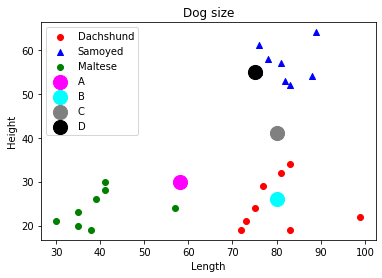

In [ ]:
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(samo_length, samo_height, c='blue', marker='^', label='Samoyed')
plt.scatter(malti_length, malti_height, c='green', label='Maltese')

plt.scatter(A[0][0], A[0][1], s=200, c='magenta', label='A')
plt.scatter(B[0][0], B[0][1], s=200, c='cyan', label='B')
plt.scatter(C[0][0], C[0][1], s=200, c='gray', label='C')
plt.scatter(D[0][0], D[0][1], s=200, c='black', label='D')


plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend(loc='upper left')

plt.show()

#1-1.k-means(비지도학습)

## Clustering

In [ ]:
dog_data = np.concatenate((dogs, A,B,C,D))
dog_data

array([[75, 24],
       [77, 29],
       [83, 19],
       [81, 32],
       [73, 21],
       [99, 22],
       [72, 19],
       [83, 34],
       [76, 55],
       [78, 58],
       [82, 53],
       [88, 54],
       [76, 61],
       [83, 52],
       [81, 57],
       [89, 64],
       [35, 23],
       [39, 26],
       [38, 19],
       [41, 30],
       [30, 21],
       [57, 24],
       [41, 28],
       [35, 20],
       [58, 30],
       [80, 26],
       [80, 41],
       [75, 55]])

In [ ]:
from sklearn import cluster
def kmeans_predict(X, k):
  model = cluster.KMeans(n_clusters=k)
  model.fit(X)
  labels = model.predict(X)
  colors = np.array(['red', 'green', 'blue', 'magenta'])
  print(X[:,0])
  print(X[:,1])
  plt.scatter(X[:,0], X[:,1], color=colors[labels])

[75 77 83 81 73 99 72 83 76 78 82 88 76 83 81 89 35 39 38 41 30 57 41 35
 58 80 80 75]
[24 29 19 32 21 22 19 34 55 58 53 54 61 52 57 64 23 26 19 30 21 24 28 20
 30 26 41 55]


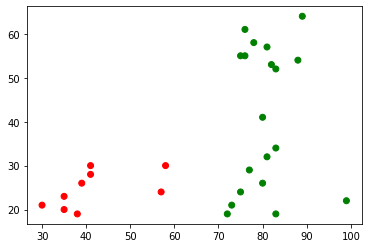

In [ ]:
kmeans_predict(dog_data, 2)

[75 77 83 81 73 99 72 83 76 78 82 88 76 83 81 89 35 39 38 41 30 57 41 35
 58 80 80 75]
[24 29 19 32 21 22 19 34 55 58 53 54 61 52 57 64 23 26 19 30 21 24 28 20
 30 26 41 55]


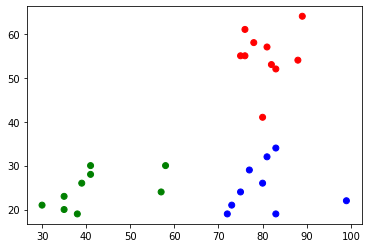

In [ ]:
kmeans_predict(dog_data, 3)

[75 77 83 81 73 99 72 83 76 78 82 88 76 83 81 89 35 39 38 41 30 57 41 35
 58 80 80 75]
[24 29 19 32 21 22 19 34 55 58 53 54 61 52 57 64 23 26 19 30 21 24 28 20
 30 26 41 55]


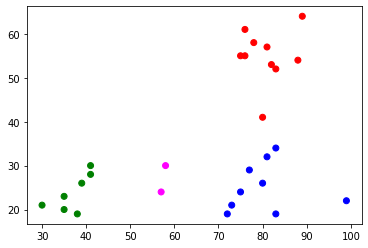

In [ ]:
kmeans_predict(dog_data, 4)

# 2.선형회귀(지도학습) - car data

## Linear Regression

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'name': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'horse power' : [130, 250, 190, 300, 210, 220, 170],
    'efficiency' : [16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]
})
df

,name,horse power,efficiency
0,A,130,16.3
1,B,250,10.2
2,C,190,11.1
3,D,300,7.1
4,E,210,12.1
5,F,220,13.2
6,G,170,14.2


In [ ]:
vehicle_df = df.set_index('name')
vehicle_df

,horse power,efficiency
name,,
A,130,16.3
B,250,10.2
C,190,11.1
D,300,7.1
E,210,12.1
F,220,13.2
G,170,14.2


In [ ]:
from sklearn.linear_model import LinearRegression

X = vehicle_df[['horse power']]
Y = vehicle_df['efficiency']

lin_model1 = LinearRegression() #모델 생성
lin_model1.fit(X, Y) #학습시키는 과정

LinearRegression()

In [ ]:
print('계수 : ', lin_model1.coef_)
print('절편 : ', lin_model1.intercept_)
print('예측점수 : ', lin_model1.score(X, Y))

계수 :  [-0.05027473]
절편 :  22.58626373626374
예측점수 :  0.8706727649378526


In [ ]:
print('270마력 자동차의 예상 연비 : ', lin_model1.predict([[270]])[0].round(2), 'km/l')

270마력 자동차의 예상 연비 :  9.01 km/l


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_pred = 270 * lin_model1.coef_ + lin_model1.intercept_
print(y_pred)

[9.01208791]


In [ ]:
import pandas as pd

df = pd.DataFrame({
    'name' : ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'horse power' : [130, 250, 190, 300, 210, 220, 170], 
    'weight': [1900, 2600, 2200, 2900, 2400, 2300, 2100],
    'efficiency': [16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2] })

vehicle_df = df.set_index('name')
print(vehicle_df)

      horse power  weight  efficiency
name                                 
A             130    1900        16.3
B             250    2600        10.2
C             190    2200        11.1
D             300    2900         7.1
E             210    2400        12.1
F             220    2300        13.2
G             170    2100        14.2


In [ ]:
from sklearn.linear_model import LinearRegression

X = vehicle_df[['horse power', 'weight']]
Y = vehicle_df['efficiency']

lin_model2 = LinearRegression() #모델 생성
lin_model2.fit(X, Y) #학습시키는 과정

LinearRegression()

In [ ]:
print('계수 : ', lin_model2.coef_)
print('절편 : ', lin_model2.intercept_)
print('예측점수 : ', lin_model2.score(X, Y))

계수 :  [-0.00689189 -0.00731081]
절편 :  30.60405405405405
예측점수 :  0.887125404119239


In [ ]:
print('270마력, 2,500kg중량 자동차의 예상 연비 : ', lin_model2.predict([[270, 2500]])[0].round(2), 'km/l')

270마력, 2,500kg중량 자동차의 예상 연비 :  10.47 km/l


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
vehicle_df.corr()

,horse power,weight,efficiency
horse power,1.000000,0.987548,-0.933098
weight,0.987548,1.000000,-0.941658
efficiency,-0.933098,-0.941658,1.000000


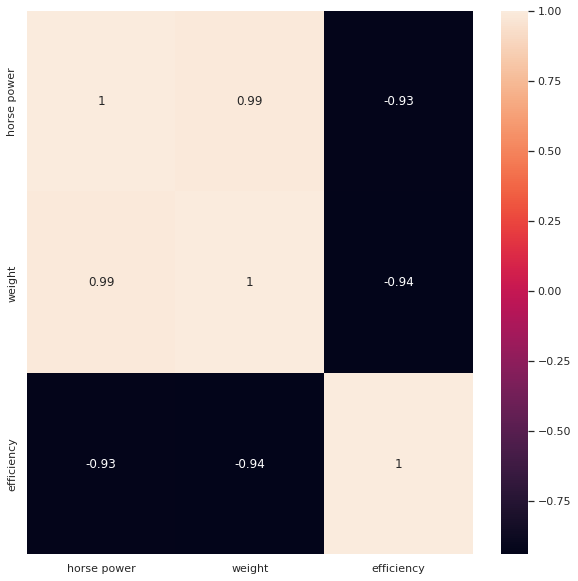

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(10, 10)})
correlation_matrix = vehicle_df.corr()
sns.heatmap(data = correlation_matrix, annot=True)

# 3.중고차 가격 예측하기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
raw_data = pd.read_csv('train-data.csv')
data = raw_data.copy()
data.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


## 모델1. Year를 독립변수로 사용하여 학습
- 훈련 데이터 준비
- train data와 test data 분리
- linear regression 알고리즘 적용/학습

In [ ]:
X = data[['Year']]
Y = data['Price']
X, Y

(      Year
 0     2010
 1     2015
 2     2011
 3     2012
 4     2013
 ...    ...
 6014  2014
 6015  2015
 6016  2012
 6017  2013
 6018  2011
 
 [6019 rows x 1 columns], 0        1.75
 1       12.50
 2        4.50
 3        6.00
 4       17.74
         ...  
 6014     4.75
 6015     4.00
 6016     2.90
 6017     2.65
 6018     2.50
 Name: Price, Length: 6019, dtype: float64)

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=25)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(4815, 1) (1204, 1) (4815,) (1204,)


In [ ]:
algo = LinearRegression()
model1 = algo.fit(trainX, trainY) #학습하기

In [ ]:
model1.coef_, model1.intercept_, model1.score(testX, testY)

(array([1.07732921]), -2159.458436265099, 0.07922163422010398)

In [ ]:
pred1 = model1.predict(testX)

In [ ]:
print('MSE : ', mean_squared_error(testY, pred1))
print('RMSE : ', np.sqrt(mean_squared_error(testY, pred1)))

MSE :  98.47753790924916
RMSE :  9.923584932334139


## 모델2. Kilometers_Driven 독립변수 추가
- boxplot으로 이상치 확인

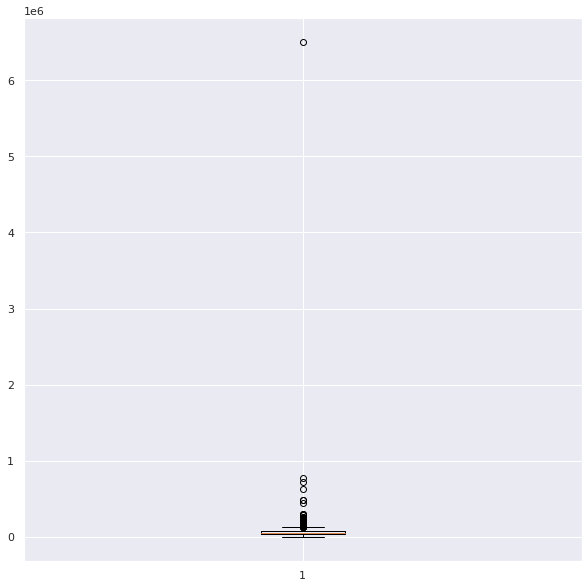

In [ ]:
plt.boxplot(data['Kilometers_Driven'])
plt.show()

In [ ]:
#이상치 제거
print(data['Kilometers_Driven'].describe())

count    6.019000e+03
mean     5.873838e+04
std      9.126884e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.300000e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64


In [ ]:
Q1 = (np.percentile(data['Kilometers_Driven'].values, 25))
Q3 = (np.percentile(data['Kilometers_Driven'].values, 75))
IQR = Q3 - Q1
lower = Q1 - (IQR*1.5)
upper = Q3 + (IQR*1.5)
print(lower, upper)

-24500.0 131500.0


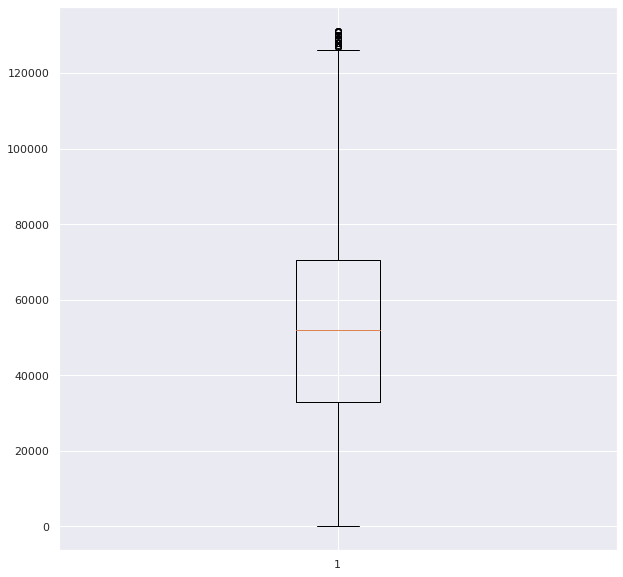

In [ ]:
data = data[(data['Kilometers_Driven'] >= lower) & (data['Kilometers_Driven'] <= upper)]
plt.boxplot(data['Kilometers_Driven'])
plt.show()

In [ ]:
X = data[['Year', 'Kilometers_Driven']]
Y = data['Price']
X, Y

(      Year  Kilometers_Driven
 0     2010              72000
 1     2015              41000
 2     2011              46000
 3     2012              87000
 4     2013              40670
 ...    ...                ...
 6014  2014              27365
 6015  2015             100000
 6016  2012              55000
 6017  2013              46000
 6018  2011              47000
 
 [5817 rows x 2 columns], 0        1.75
 1       12.50
 2        4.50
 3        6.00
 4       17.74
         ...  
 6014     4.75
 6015     4.00
 6016     2.90
 6017     2.65
 6018     2.50
 Name: Price, Length: 5817, dtype: float64)

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=25)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(4653, 2) (1164, 2) (4653,) (1164,)


In [ ]:
model2 = algo.fit(trainX, trainY)
model2.score(testX, testY)

0.11518931484733497

In [ ]:
pred2 = model2.predict(testX)
print('MSE : ', mean_squared_error(testY, pred2))
print('RMSE : ', np.sqrt(mean_squared_error(testY, pred2)))

MSE :  102.90755569991902
RMSE :  10.144336138945663


## 모델3. Transmission 범주형 독립변수 추가
- 원핫인코딩

In [ ]:
data = pd.get_dummies(data=data, columns=['Transmission'])
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0


In [ ]:
X = data[['Year', 'Kilometers_Driven', 'Transmission_Automatic', 'Transmission_Manual']]
Y = data['Price']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=25)

model3 = algo.fit(trainX, trainY)
pred3 = model3.predict(testX)
print('score : ', model3.score(testX, testY))
print('MSE:',mean_squared_error(testY, pred3))
print('RMSE:',np.sqrt(mean_squared_error(testY, pred3)))

score :  0.43845980108244187
MSE: 65.30971005157076
RMSE: 8.081442324954795


## 모델4. Price 종속변수 이상치 제거

In [ ]:
mean = data['Price'].mean()
std = data['Price'].std()
lower = mean - (3*std)
upper = mean + (3*std)
print(lower, upper)

-24.3222916184478 43.525141884908145


In [ ]:
data = data[(data['Price'] >= lower) & (data['Price'] <= upper)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5671 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    5671 non-null   object 
 1   Location                5671 non-null   object 
 2   Year                    5671 non-null   int64  
 3   Kilometers_Driven       5671 non-null   int64  
 4   Fuel_Type               5671 non-null   object 
 5   Owner_Type              5671 non-null   object 
 6   Mileage                 5669 non-null   object 
 7   Engine                  5636 non-null   object 
 8   Power                   5636 non-null   object 
 9   Seats                   5630 non-null   float64
 10  New_Price               771 non-null    object 
 11  Price                   5671 non-null   float64
 12  Transmission_Automatic  5671 non-null   uint8  
 13  Transmission_Manual     5671 non-null   uint8  
dtypes: float64(2), int64(2), object(8), uint

In [ ]:
X = data[['Year', 'Kilometers_Driven', 'Transmission_Automatic', 'Transmission_Manual']]
Y = data['Price']
print(X, Y)

      Year  Kilometers_Driven  Transmission_Automatic  Transmission_Manual
0     2010              72000                       0                    1
1     2015              41000                       0                    1
2     2011              46000                       0                    1
3     2012              87000                       0                    1
4     2013              40670                       1                    0
...    ...                ...                     ...                  ...
6014  2014              27365                       0                    1
6015  2015             100000                       0                    1
6016  2012              55000                       0                    1
6017  2013              46000                       0                    1
6018  2011              47000                       0                    1

[5671 rows x 4 columns] 0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
     

In [ ]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=25)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

model4 = algo.fit(trainX, trainY)
pred4 = model4.predict(testX)

(4536, 4) (1135, 4) (4536,) (1135,)


In [ ]:
print('Score : ', model3.score(testX, testY))
print('MSE : ', mean_squared_error(testY, pred4))
print('RMSE : ', np.sqrt(mean_squared_error(testY, pred4)))

Score :  0.46782452679005326
MSE :  32.732645998879434
RMSE :  5.721245144099266


## 모델5. Fuel_type 독립변수 추가
- 원핫인코딩

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5671 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    5671 non-null   object 
 1   Location                5671 non-null   object 
 2   Year                    5671 non-null   int64  
 3   Kilometers_Driven       5671 non-null   int64  
 4   Fuel_Type               5671 non-null   object 
 5   Owner_Type              5671 non-null   object 
 6   Mileage                 5669 non-null   object 
 7   Engine                  5636 non-null   object 
 8   Power                   5636 non-null   object 
 9   Seats                   5630 non-null   float64
 10  New_Price               771 non-null    object 
 11  Price                   5671 non-null   float64
 12  Transmission_Automatic  5671 non-null   uint8  
 13  Transmission_Manual     5671 non-null   uint8  
dtypes: float64(2), int64(2), object(8), uint

In [ ]:
data = pd.get_dummies(data = data, columns = ['Fuel_Type'])
data.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,1,1,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0,1,0,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1,0,0,0,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,0,1,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0,0,1,0,0,0


In [ ]:
X = data[['Year', 'Kilometers_Driven', 'Transmission_Automatic', 'Transmission_Manual', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol']]
Y = data['Price']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=25)

model5 = algo.fit(trainX, trainY)
pred5 = model5.predict(testX)
print('score : ', model5.score(testX, testY))
print('MSE:',mean_squared_error(testY, pred5))
print('RMSE:',np.sqrt(mean_squared_error(testY, pred5)))

score :  0.5444912124047662
MSE: 28.01708955844994
RMSE: 5.293117187296153


## 모델6. Mileage 독립변수 추가
- 결측치 제거, km/kg 제거

In [ ]:
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
4446,Mahindra E Verito D4,Chennai,2016,50000,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00,1,0,0,0,1,0,0
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75,1,0,0,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5671 entries, 0 to 6018
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    5671 non-null   object 
 1   Location                5671 non-null   object 
 2   Year                    5671 non-null   int64  
 3   Kilometers_Driven       5671 non-null   int64  
 4   Owner_Type              5671 non-null   object 
 5   Mileage                 5669 non-null   object 
 6   Engine                  5636 non-null   object 
 7   Power                   5636 non-null   object 
 8   Seats                   5630 non-null   float64
 9   New_Price               771 non-null    object 
 10  Price                   5671 non-null   float64
 11  Transmission_Automatic  5671 non-null   uint8  
 12  Transmission_Manual     5671 non-null   uint8  
 13  Fuel_Type_CNG           5671 non-null   uint8  
 14  Fuel_Type_Diesel        5671 non-null   

In [ ]:
index = data[data.Mileage.isnull()].index
data = data.drop(index)

data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    5669 non-null   object 
 1   Location                5669 non-null   object 
 2   Year                    5669 non-null   int64  
 3   Kilometers_Driven       5669 non-null   int64  
 4   Owner_Type              5669 non-null   object 
 5   Mileage                 5669 non-null   object 
 6   Engine                  5634 non-null   object 
 7   Power                   5634 non-null   object 
 8   Seats                   5628 non-null   float64
 9   New_Price               770 non-null    object 
 10  Price                   5669 non-null   float64
 11  Transmission_Automatic  5669 non-null   uint8  
 12  Transmission_Manual     5669 non-null   uint8  
 13  Fuel_Type_CNG           5669 non-null   uint8  
 14  Fuel_Type_Diesel        5669 non-null   

In [ ]:
for i in range(data.shape[0]):
  data.at[i, 'New_Mileage'] = data['Mileage'][i].split()[0]

data.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,New_Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,1,1,0,0,0,0,26.6
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0,1,0,1,0,0,0,19.67
2,Honda Jazz V,Chennai,2011,46000,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1,0,0,0,0,1,18.2
3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,0,1,0,1,0,0,0,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0,0,1,0,0,0,15.2


In [ ]:
data.tail(5)

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,New_Mileage
5664,Maruti Swift VDI,Delhi,2014,27365,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,0,1,0,1,0,0,0,28.4
5665,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,0,1,0,1,0,0,0,24.4
5666,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,0,1,0,1,0,0,0,14.0
5667,Maruti Wagon R VXI,Kolkata,2013,46000,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,0,1,0,0,0,0,1,18.9
5668,Chevrolet Beat Diesel,Hyderabad,2011,47000,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50,0,1,0,1,0,0,0,25.44


In [ ]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price',
       'Transmission_Automatic', 'Transmission_Manual', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'New_Mileage'],
      dtype='object')

In [ ]:
X = data[['Year', 'Kilometers_Driven', 'Transmission_Automatic', 'Transmission_Manual',
          'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
          'Fuel_Type_Petrol', 'New_Mileage']]
Y = data['Price']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=25)

model6 = algo.fit(trainX, trainY)
pred6 = model6.predict(testX)
print('score : ', model6.score(testX, testY))
print('mse : ', mean_squared_error(testY, pred6))
print('RMSE : ', np.sqrt(mean_squared_error(testY, pred6)))

score :  0.6284053676459871
mse :  22.05441460287455
RMSE :  4.696212793610885


## 모델7. Engine Feature 독립변수 추가
- 결측치 제거, CC 제거

In [ ]:
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,New_Mileage
184,Honda City 1.5 GXI,Ahmedabad,2007,60006,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95,0,1,0,0,0,0,1,0.0
198,Maruti Swift 1.3 VXi,Kolkata,2010,42001,First,16.1 kmpl,NaN,NaN,NaN,NaN,2.11,0,1,0,0,0,0,1,16.1
681,Maruti Swift 1.3 VXi,Chennai,2006,97800,Third,16.1 kmpl,NaN,NaN,NaN,NaN,1.75,0,1,0,0,0,0,1,16.1
697,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Second,0.0 kmpl,NaN,NaN,NaN,NaN,26.50,1,0,0,1,0,0,0,0.0
1215,Honda City 1.3 DX,Delhi,2009,55005,First,12.8 kmpl,NaN,NaN,NaN,NaN,3.20,0,1,0,0,0,0,1,12.8
1247,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,First,16.1 kmpl,NaN,NaN,NaN,NaN,5.80,0,1,0,0,0,0,1,16.1
1303,Honda City 1.5 GXI,Pune,2004,115000,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.50,0,1,0,0,0,0,1,0.0
1373,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,First,0.0 kmpl,NaN,NaN,NaN,NaN,40.88,0,1,0,0,0,0,1,0.0
1947,Maruti Swift 1.3 LXI,Pune,2011,24255,First,16.1 kmpl,NaN,NaN,NaN,NaN,3.15,0,1,0,0,0,0,1,16.1
1966,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.93,0,1,0,0,0,0,1,0.0


In [ ]:
index = data[data.Engine.isnull()].index
data = data.drop(index)

data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    5634 non-null   object 
 1   Location                5634 non-null   object 
 2   Year                    5634 non-null   int64  
 3   Kilometers_Driven       5634 non-null   int64  
 4   Owner_Type              5634 non-null   object 
 5   Mileage                 5634 non-null   object 
 6   Engine                  5634 non-null   object 
 7   Power                   5634 non-null   object 
 8   Seats                   5628 non-null   float64
 9   New_Price               770 non-null    object 
 10  Price                   5634 non-null   float64
 11  Transmission_Automatic  5634 non-null   uint8  
 12  Transmission_Manual     5634 non-null   uint8  
 13  Fuel_Type_CNG           5634 non-null   uint8  
 14  Fuel_Type_Diesel        5634 non-null   

In [ ]:
data.head(3)

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,New_Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,1,1,0,0,0,0,26.6
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0,1,0,1,0,0,0,19.67
2,Honda Jazz V,Chennai,2011,46000,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1,0,0,0,0,1,18.2


In [ ]:
for i in range(data.shape[0]):
  data.at[i, 'New_Engine'] = data['Engine'][i].split()[0]

data.head(3)

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,New_Mileage,New_Engine
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,1,1,0,0,0,0,26.6,998
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0,1,0,1,0,0,0,19.67,1582
2,Honda Jazz V,Chennai,2011,46000,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1,0,0,0,0,1,18.2,1199


In [ ]:
X = data[['Year', 'Kilometers_Driven', 'Transmission_Automatic', 'Transmission_Manual',
          'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
          'Fuel_Type_Petrol', 'New_Mileage', 'New_Engine']]
Y = data['Price']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=25)

model7 = algo.fit(trainX, trainY)
pred7 = model7.predict(testX)

print('score : ', model7.score(testX, testY))
print('mse : ', mean_squared_error(testY, pred7))
print('RMSE : ', np.sqrt(mean_squared_error(testY, pred7)))

score :  0.6674040516906645
mse :  23.082748520965197
RMSE :  4.8044509073322


## 모델8. Seats 독립변수 추가
- 결측치에 최빈값으로 채우기

In [ ]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,New_Mileage,New_Engine
216,Ford Figo Diesel,Bangalore,2015,70436,First,0.0 kmpl,1498 CC,99 bhp,NaN,NaN,3.60,0,1,0,1,0,0,0,0.0,1498
1791,Honda City 1.5 EXI,Jaipur,2005,88000,Second,13.0 kmpl,1493 CC,100 bhp,NaN,NaN,1.70,0,1,0,0,0,0,1,13.0,1493
2210,Maruti Estilo LXI,Chennai,2008,56000,Second,19.5 kmpl,1061 CC,null bhp,NaN,NaN,1.50,0,1,0,0,0,0,1,19.5,1061
3553,Ford Endeavour Hurricane LE,Mumbai,2012,129000,First,12.8 kmpl,2953 CC,null bhp,NaN,NaN,7.00,1,0,0,1,0,0,0,12.8,2953
3633,Maruti Estilo LXI,Kolkata,2010,40000,Second,19.5 kmpl,1061 CC,null bhp,NaN,NaN,2.50,0,1,0,0,0,0,1,19.5,1061
5515,Maruti Estilo LXI,Chennai,2008,51000,Second,19.5 kmpl,1061 CC,null bhp,NaN,NaN,1.75,0,1,0,0,0,0,1,19.5,1061


In [ ]:
data['Seats'].value_counts()

5.0     4813
7.0      587
8.0      108
4.0       77
6.0       29
2.0        7
10.0       4
9.0        2
0.0        1
Name: Seats, dtype: int64

In [ ]:
data['Seats'].value_counts().idxmax()

5.0

In [ ]:
data['Seats'].fillna(data['Seats'].value_counts().idxmax(), inplace=True)
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,New_Mileage,New_Engine


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    5634 non-null   object 
 1   Location                5634 non-null   object 
 2   Year                    5634 non-null   int64  
 3   Kilometers_Driven       5634 non-null   int64  
 4   Owner_Type              5634 non-null   object 
 5   Mileage                 5634 non-null   object 
 6   Engine                  5634 non-null   object 
 7   Power                   5634 non-null   object 
 8   Seats                   5634 non-null   float64
 9   New_Price               770 non-null    object 
 10  Price                   5634 non-null   float64
 11  Transmission_Automatic  5634 non-null   uint8  
 12  Transmission_Manual     5634 non-null   uint8  
 13  Fuel_Type_CNG           5634 non-null   uint8  
 14  Fuel_Type_Diesel        5634 non-null   

In [ ]:
X = data[['Year', 'Kilometers_Driven', 'Transmission_Automatic', 'Transmission_Manual',
          'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
          'Fuel_Type_Petrol', 'New_Mileage', 'New_Engine', 'Seats']]
Y = data['Price']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=25)

model8 = algo.fit(trainX, trainY)
pred8 = model8.predict(testX)

print('score : ', model8.score(testX, testY))
print('mse : ', mean_squared_error(testY, pred8))
print('RMSE : ', np.sqrt(mean_squared_error(testY, pred8)))

score :  0.6847190646312991
mse :  21.881055922550864
RMSE :  4.6777190940191


## 모델9. Power 독립변수 추가
- 결측치 제거, bhp 제거

In [ ]:
data[data['Power'].isnull()]

index = data[data.Power.isnull()].index
data = data.drop(index)

data = data.reset_index(drop=True)
data.info()

for i in range(data.shape[0]):
  data.at[i, 'New_Power'] = data['Power'][i].split()[0]

data.head()

X = data[['Year', 'Kilometers_Driven', 'Transmission_Automatic', 'Transmission_Manual',
          'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
          'Fuel_Type_Petrol', 'New_Mileage', 'New_Engine', 'Seats', 'New_Power']]
Y = data['Price']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=25)

model9 = algo.fit(trainX, trainY)
pred9 = model9.predict(testX)

print('score : ', model9.score(testX, testY))
print('mse : ', mean_squared_error(testY, pred9))
print('RMSE : ', np.sqrt(mean_squared_error(testY, pred9)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       5634 non-null   object 
 1   Location                   5634 non-null   object 
 2   Year                       5634 non-null   int64  
 3   Kilometers_Driven          5634 non-null   int64  
 4   Mileage                    5634 non-null   object 
 5   Engine                     5634 non-null   object 
 6   Power                      5634 non-null   object 
 7   Seats                      5634 non-null   float64
 8   New_Price                  770 non-null    object 
 9   Price                      5634 non-null   float64
 10  Transmission_Automatic     5634 non-null   uint8  
 11  Transmission_Manual        5634 non-null   uint8  
 12  Fuel_Type_CNG              5634 non-null   uint8  
 13  Fuel_Type_Diesel           5634 non-null   uint8

ValueError: ignored

## 모델10. Owner_Type 독립변수 추가
- 원핫인코딩

In [ ]:
data = pd.get_dummies(data = data, columns = ['Owner_Type'])
data.head()

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,New_Mileage,New_Engine,New_Power,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,1,1,0,0,0,0,26.6,998,58.16,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0,1,0,1,0,0,0,19.67,1582,126.2,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1,0,0,0,0,1,18.2,1199,88.7,1,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,0,1,0,1,0,0,0,20.77,1248,88.76,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0,0,1,0,0,0,15.2,1968,140.8,0,0,1,0


In [ ]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine',
       'Power', 'Seats', 'New_Price', 'Price', 'Transmission_Automatic',
       'Transmission_Manual', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'New_Mileage', 'New_Engine', 'New_Power', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [ ]:
X = data[['Year', 'Kilometers_Driven', 'Transmission_Automatic', 'Transmission_Manual',
          'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
          'Fuel_Type_Petrol', 'New_Mileage', 'New_Engine', 'Seats', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third']]
Y = data['Price']

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=25)

model10 = algo.fit(trainX, trainY)
pred10 = model10.predict(testX)

print('score : ', model10.score(testX, testY))
print('mse : ', mean_squared_error(testY, pred10))
print('RMSE : ', np.sqrt(mean_squared_error(testY, pred10)))

score :  0.6847289331959661
mse :  21.880371026665536
RMSE :  4.677645885129135
